In [1]:
## Importando bibliotecas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## importando dataframe:

candy = pd.read_csv('candy_production.csv')

In [13]:
## Primeira olhada

candy.head(12)

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
5,1972-06-01,67.6467
6,1972-07-01,69.0429
7,1972-08-01,70.8370
8,1972-09-01,75.0462
9,1972-10-01,106.9289


In [15]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  548 non-null    object 
 1   IPG3113N          548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [17]:
## convertendo a coluna data para o formato data:
candy['observation_date'] = pd.to_datetime(candy['observation_date'])

In [19]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  548 non-null    datetime64[ns]
 1   IPG3113N          548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


<Axes: xlabel='observation_date'>

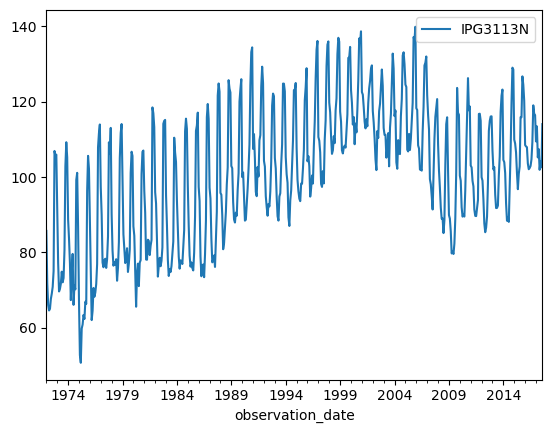

In [21]:
candy.plot(x='observation_date', y='IPG3113N')

In [33]:
## Fazer ujm recorte nos dados para melhorar a visualização:

candy_filtered = candy[candy['observation_date'] >= '2010-01-01']

In [35]:
candy_filtered

,observation_date,IPG3113N
456,2010-01-01,100.3797
457,2010-02-01,99.0155
458,2010-03-01,91.9654
459,2010-04-01,89.4914
460,2010-05-01,89.9713
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


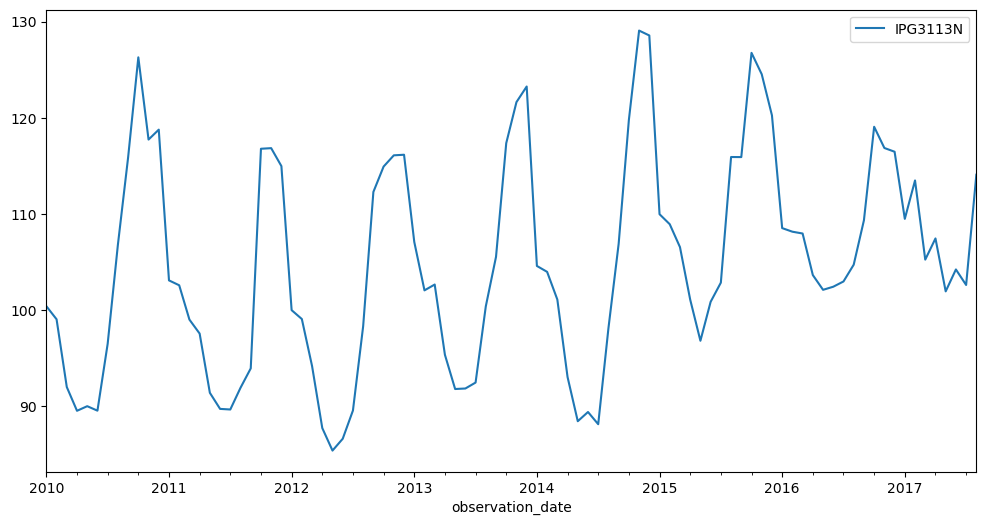

In [39]:
ax = candy_filtered.plot(x='observation_date', y='IPG3113N', figsize=(12, 6))

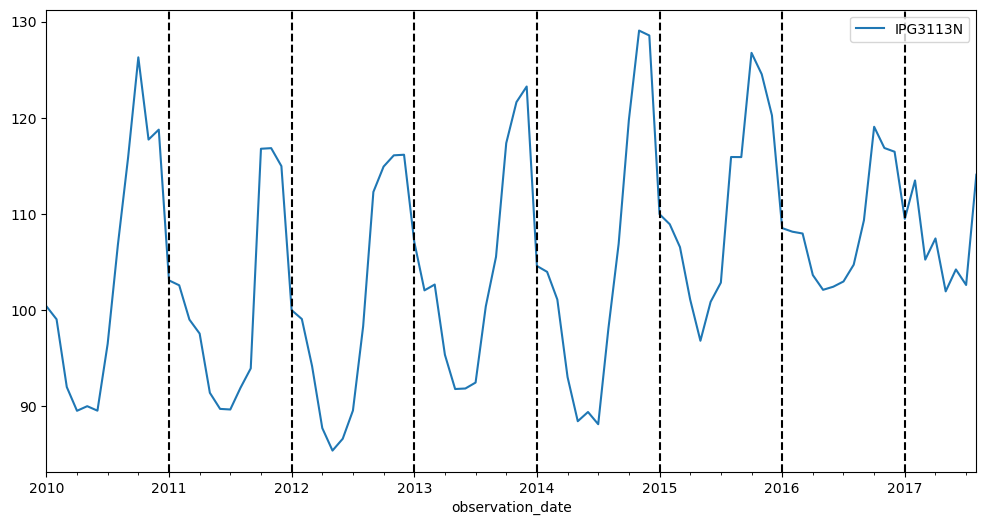

In [43]:
ax = candy_filtered.plot(x='observation_date', y='IPG3113N', figsize=(12, 6))
x_coords = ['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']

for xc in x_coords:
    plt.axvline(x=xc,color='black', linestyle='--')

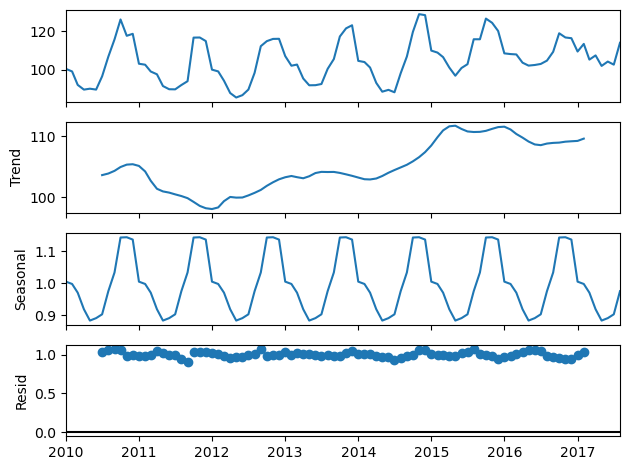

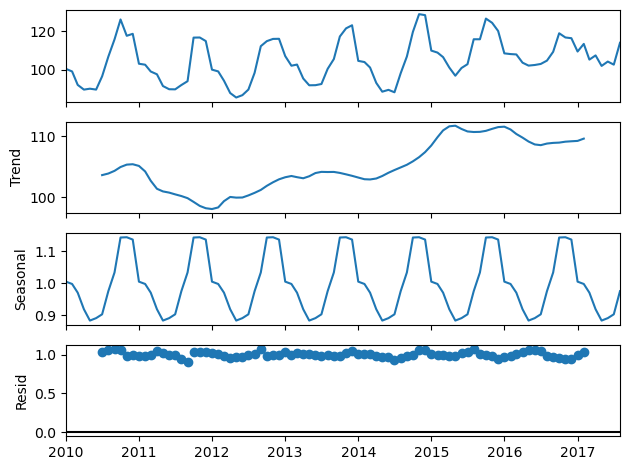

In [45]:
## Decomposição da sazonalidade:

from statsmodels.tsa.seasonal import seasonal_decompose

candy_filtered.set_index('observation_date', inplace=True)

analysis = candy_filtered[['IPG3113N']].copy()

decompose_result = seasonal_decompose(analysis, model = 'multiplicativo')

trend = decompose_result.trend ## Tendência
seasonal = decompose_result.seasonal ## Sazonalidade
residual = decompose_result.resid ## Resíduo

decompose_result.plot()